In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [50]:
test_data_2 = pd.read_csv("test.csv")

In [3]:
print("train_data, ",train_data.shape)
print("test_data, ",test_data.shape)

train_data,  (891, 12)
test_data,  (418, 11)


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Review description for numerical data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Review description for categorical data
train_data.describe(include = "O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hegarty, Miss. Hanora ""Nora""",male,CA. 2343,G6,S
freq,1,577,7,4,644


### 2. Check the correlation between Pclass and Survived variables

In [10]:
pd.pivot_table(data=train_data, index='Pclass', values='Survived', aggfunc='mean').reset_index().rename(columns={"Survived":"Possibility of surviving"})


,Pclass,Possibility of surviving
0,1,0.629630
1,2,0.472826
2,3,0.242363


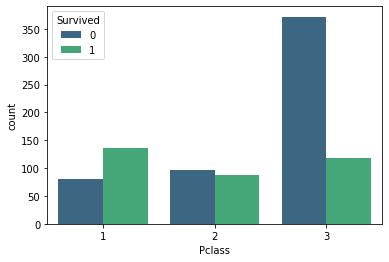

In [11]:
sns.countplot(x = "Pclass", hue = "Survived",data = train_data,palette = "viridis")

We can observe significant difference in possibility of surviving among three passenger's classes.

As we can see passengers in class 1 can have much more surviving chance compared to passengers from 2 other classes.

Decision: include "Pclass" into classification model

### 3. Check the correlation between Embarked and Survived variables

In [12]:
pd.pivot_table(data=train_data, index='Embarked', values='Survived', aggfunc='mean').reset_index().rename(columns={"Survived":"Possibility of surviving"})

,Embarked,Possibility of surviving
0,C,0.553571
1,Q,0.389610
2,S,0.336957


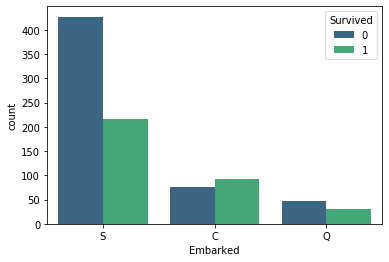

In [13]:
sns.countplot(x = "Embarked", hue = "Survived",data = train_data,palette  ="viridis")

Passengers who has embarked value == Q, has higher surviving possibility.

Decision: include "Pclass" into classification model

### 4. Check the correlation between Sex and Survived variables

In [14]:
pd.pivot_table(data=train_data, index='Sex', values='Survived', aggfunc='mean').reset_index().rename(columns={"Survived":"Possibility of surviving"}).sort_values(by = "Possibility of surviving", ascending=False)

,Sex,Possibility of surviving
0,female,0.742038
1,male,0.188908


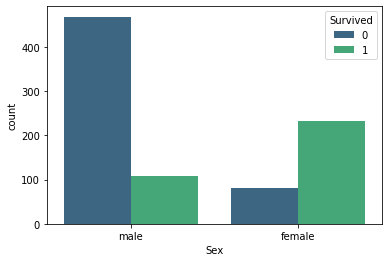

In [15]:
sns.countplot(x = "Sex", hue = "Survived",data = train_data,palette  ="viridis")

As we can see, there's a remarkable evidence that proves the gap of surviving possibility between men and women

### 5. Check the distribution of "Age" based on "Survived" variable.

In [16]:
train_data["Age"].isnull().sum()

177

(0, 80)

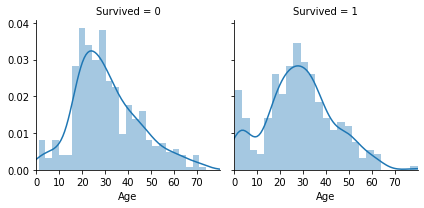

In [17]:
agehist = sns.FacetGrid(data = train_data,col = "Survived")
agehist.map(sns.distplot,"Age",bins = 25)
plt.xticks(range(0,80,10))
plt.xlim(0,80)

### 6. Commbination of "Embarked", "Pclass", and "Survived" variables

In [18]:
pd.pivot_table(data = train_data,values = "Survived",aggfunc = "mean", index = ["Embarked","Sex"],columns = "Pclass",margins=False)

Pclass                  1         2         3
Embarked Sex                                 
C        female  0.976744  1.000000  0.652174
         male    0.404762  0.200000  0.232558
Q        female  1.000000  1.000000  0.727273
         male    0.000000  0.000000  0.076923
S        female  0.958333  0.910448  0.375000
         male    0.354430  0.154639  0.128302

Analyze this combination of three variables, we can see some insights as follow:

- Women has in class 1 and class 2 have significant surviving chance, but on the other hand women in class 3 just cannot have the same chance.

- The high chance of surviving of class 1 also applied the men in this class.

## Data Wrangling

In [19]:
# Add new feature: "Family" = SibSp + Parch
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
test_data['Family'] = test_data['SibSp'] + test_data['Parch']

pd.pivot_table(data = train_data, values = "Survived",aggfunc = "mean", index = "Family").rename(columns = {"Survived":"Possibility of surviving"}).sort_values(by="Possibility of surviving",ascending = False)

,Possibility of surviving
Family,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


Number of family members on board can somehow affect the chance of surviving

Consider being with other family members has a considerable impact, we should add a binary feature "IsAlone" to the datasets.

In [20]:
train_data['IsAlone'] = 0
test_data['IsAlone'] = 0

train_data.loc[train_data['Family'] == 0, 'IsAlone'] = 1
test_data.loc[test_data['Family'] == 0, 'IsAlone'] = 1

print (train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


Lonely passenngers on board has a slightly lower chance of surviving compared to those with their family

In [21]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# fill in missing value of "Embarked" varible with most occurred value "S" 

train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Embarked'] = test_data['Embarked'].fillna('S')


print (train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


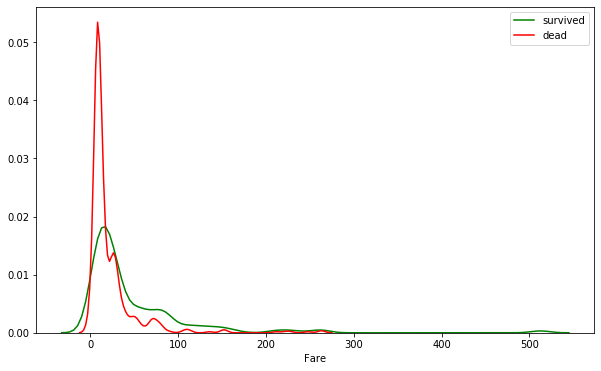

In [23]:
#Split "Fare" features into sub categorical features
plt.figure(figsize = (10,6))
sns.distplot(train_data[train_data["Survived"] == 1]["Fare"],color = "green", hist = False,label = "survived")
sns.distplot(train_data[train_data["Survived"] == 0]["Fare"],color = "red", hist = False, label = "dead")

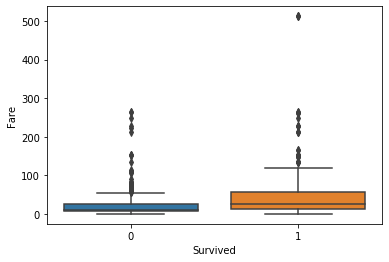

In [24]:
sns.boxplot(x = "Survived",y = "Fare",data= train_data)

In [25]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'IsAlone'],
      dtype='object')

In [26]:
train_data["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [27]:
for dataset in [train_data,test_data]:
    dataset['Fare'] = dataset['Fare'].fillna(train_data['Fare'].median())

train_data['CategoricalFare'] = pd.qcut(train_data['Fare'], 4)
print(train_data[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


There are some differences between fare distribution of survived people and the other unfortunate people.

In [28]:
#Fill in  the missing values
for dataset in [train_data,test_data]:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

#Split "Age"
train_data['CategoricalAge'] = pd.cut(train_data['Age'], 5)

print (train_data[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.537037
1   (16.0, 32.0]  0.350562
2   (32.0, 48.0]  0.375969
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# Name variable
# inside this feature we can find the title of people.

import re as re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in [train_data,test_data]:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train_data['Title'], train_data['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [37]:
#create a new column for title variable and check the impact on surviving possibility
for dataset in [train_data,test_data]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

   Title  Survived
0      1  0.156673
1      2  0.702703
2      3  0.793651
3      4  0.575000
4      5  0.347826


In [31]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'IsAlone',
       'CategoricalFare', 'CategoricalAge', 'Title'],
      dtype='object')

In [32]:
train_data["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [33]:
for dataset in [train_data,test_data]:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'Family']
train_data = train_data.drop(drop_elements, axis = 1)
train_data = train_data.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test_data  = test_data.drop(drop_elements, axis = 1)

train_1 = train_data.values
test_1  = test_data.values

In [39]:
train_1

array([[0, 3, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 3],
       [1, 3, 0, ..., 0, 1, 2],
       ...,
       [0, 3, 0, ..., 0, 0, 2],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 3, 1, ..., 2, 1, 1]])

### Building classification models
#### Model selection

In [41]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [45]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

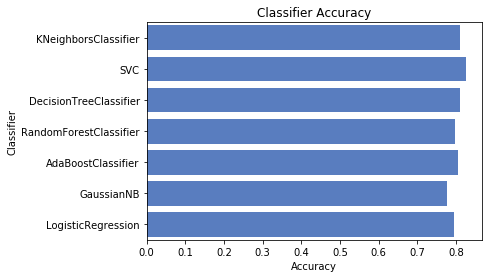

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_1[0::, 1::]
y = train_1[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

#### Make prediction

In [47]:
#SVC seems to be the algorithm that brings the best results.
candidate_classifier = SVC()
candidate_classifier.fit(train_1[0::, 1::], train_1[0::, 0])
result = candidate_classifier.predict(test_1)

/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [52]:
output = pd.DataFrame({'PassengerId': test_data_2.PassengerId, 'Survived': result})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

output.to_csv('my_submission.csv', index=False)

output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
